# Wavelength Loss dependence for N2 with PML

Checking for ripples here

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton

# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [4]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ts = [15*2.7183333333333333e-6, 10e-6,
      15*2.7183333333333333e-6, 15*2.7183333333333333e-6]

mats = ['air', 'glass', 'air', 'glass']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x:n_glass]
maxhs = [100,100,100,100]
scale=15e-6


A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, wl=wls[0], scale=scale,
              no_mesh=True)

Boundary names not provided, using default names.


# First get exact values

In [5]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, ns=ns, mats=mats, maxhs=maxhs, wl=wl, scale=scale,
                  no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low) +0*1j
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess = 1/.999999 * guess.real + imag * 1j
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag  # set current imaginary part as guess for next one
                flag=False
        except RuntimeError:
            guess = .999999 * guess.real + 1j * imag
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (67.33280436820458-2.3073697468249653e-07j) . Residual of determinant:  4.3071548878243094e-11 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (67.23672165964359-2.019347541473243e-07j) . Residual of determinant:  2.6513037651301406e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.14091441191505-1.798373239018877e-07j) . Residual of determinant:  2.0344232956808582e-10 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (67.04538103871661-1

Scaled beta:  (64.38843729260108-8.254621438345761e-07j) . Residual of determinant:  5.9709818975435e-11 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.30053500852004-1.1346820571334352e-06j) . Residual of determinant:  2.7663822686171035e-12 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.2128564336872-1.660291024142607e-06j) . Residual of determinant:  1.3382694697540813e-11 


     --------------------  36/301: wavelength: 1.47e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.12538980531122-2.651877372682796e-06j) . Residual of determinant:  1.1697532664438638e-11 


     --------------------  37/301: wavelength: 1.4719999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (61.691253654421224-1.4566788331550937e-07j) . Residual of determinant:  1.763416239011602e-10 


     --------------------  66/301: wavelength: 1.53e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.610588651977416-1.4527802948275678e-07j) . Residual of determinant:  5.441606869349019e-11 


     --------------------  67/301: wavelength: 1.532e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.530134261767955-1.4578400957430378e-07j) . Residual of determinant:  1.761909216528027e-10 


     --------------------  68/301: wavelength: 1.5339999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.44988962155125-1.4718655606580044e-07j) . Residual of determinant:  5.996045229466835e-11 


     --------------------  69/301: wavelength: 1.536e-06  --------------------     



scaling guess: 1
Scaled beta:  (59.28945030805014-2.5368108996165824e-05j) . Residual of determinant:  1.4124818975632033e-13 


     --------------------  97/301: wavelength: 1.592e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (59.21394238966239-1.5991312790291525e-05j) . Residual of determinant:  1.1246708252558793e-12 


     --------------------  98/301: wavelength: 1.594e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (59.137964063113834-1.0911871132593948e-05j) . Residual of determinant:  6.562840391560442e-13 


     --------------------  99/301: wavelength: 1.5959999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (59.06324310762068-6.365477883695143e-06j) . Residual of determinant:  8.080156088952401e-12 


     --------------------  100/301: wavelength: 1.598e-06  --------------------     


Scaled beta:  (57.05968203931877-1.973454630070374e-07j) . Residual of determinant:  8.845271934909158e-11 


     --------------------  128/301: wavelength: 1.654e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (56.99066324137441-1.978639353848257e-07j) . Residual of determinant:  3.129795747827446e-10 


     --------------------  129/301: wavelength: 1.656e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.921811125975516-1.992755534203141e-07j) . Residual of determinant:  3.941003737258615e-10 


     --------------------  130/301: wavelength: 1.6579999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.853125061984045-2.0159489711658648e-07j) . Residual of determinant:  1.608722098192041e-10 


     --------------------  131/301: wavelength: 1.6599999999999998e-

scaling guess: 1
scaling guess: 2
Scaled beta:  (54.99458681347559-5.2847363746667145e-06j) . Residual of determinant:  2.3428055640191245e-12 


     --------------------  159/301: wavelength: 1.716e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (54.93034524266208-8.134742111642466e-06j) . Residual of determinant:  3.4521037362027784e-12 


     --------------------  160/301: wavelength: 1.718e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (54.86619326110254-1.3704841411019605e-05j) . Residual of determinant:  1.5953473092991254e-12 


     --------------------  161/301: wavelength: 1.7199999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (54.802087611751105-2.574185848269749e-05j) . Residual of determinant:  7.879266778597448e-13 


     --------------------  162/301: wavelength: 

Scaled beta:  (53.015134977984516-3.1062495651132043e-07j) . Residual of determinant:  3.643742094722368e-11 


     --------------------  191/301: wavelength: 1.78e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.95554360915646-3.0205435637199856e-07j) . Residual of determinant:  4.1791132086819015e-11 


     --------------------  192/301: wavelength: 1.7819999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.896086201773734-2.9485831241839944e-07j) . Residual of determinant:  1.6313862527619552e-10 


     --------------------  193/301: wavelength: 1.7839999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.836762270903805-2.8891118797030655e-07j) . Residual of determinant:  1.33048682146173e-10 


     --------------------  194/301: wavelength: 1.786e-06  --------------------     

Boundary names not provided, usin

Scaled beta:  (51.17236422755178-7.247605221078868e-07j) . Residual of determinant:  4.1162206704971156e-11 


     --------------------  223/301: wavelength: 1.8439999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (51.116831369489596-7.986700680479242e-07j) . Residual of determinant:  1.2121810349728647e-11 


     --------------------  224/301: wavelength: 1.8459999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (51.06141743895882-8.864818444382237e-07j) . Residual of determinant:  5.040498898024843e-11 


     --------------------  225/301: wavelength: 1.848e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (51.00612180292418-9.917550011558442e-07j) . Residual of determinant:  1.0884656677264759e-11 


     --------------------  226/301: wavelength: 1.8499999999999999e-06  --------------------     

Bounda

Scaled beta:  (49.50609964000055-1.7680307571869564e-06j) . Residual of determinant:  9.287168049062205e-12 


     --------------------  254/301: wavelength: 1.9059999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.45410140799708-1.549747326873578e-06j) . Residual of determinant:  3.05154569755067e-11 


     --------------------  255/301: wavelength: 1.9079999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.40221678725315-1.3732524853607595e-06j) . Residual of determinant:  7.047060279888899e-13 


     --------------------  256/301: wavelength: 1.91e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (49.350444479624244-1.2286681364445943e-06j) . Residual of determinant:  1.1572771327769434e-11 


     --------------------  257/301: wavelength: 1.9119999999999997e-06  --------------------     

Boundary names not provi

Scaled beta:  (47.895249309052176-3.955848076598424e-07j) . Residual of determinant:  1.3889263922597778e-10 


     --------------------  286/301: wavelength: 1.9699999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (47.846601894153565-3.973545973405484e-07j) . Residual of determinant:  4.1491905285402e-11 


     --------------------  287/301: wavelength: 1.972e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.79805312145703-4.000194264935025e-07j) . Residual of determinant:  4.067194528553241e-11 


     --------------------  288/301: wavelength: 1.974e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (47.74960267729667-4.035940301937685e-07j) . Residual of determinant:  1.0401107673930318e-10 


     --------------------  289/301: wavelength: 1.976e-06  --------------------     



In [6]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 10e-6

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

In [7]:
np.save('betas1_N2', betas1)

In [8]:
betas1 = np.load('betas1_N2.npy')

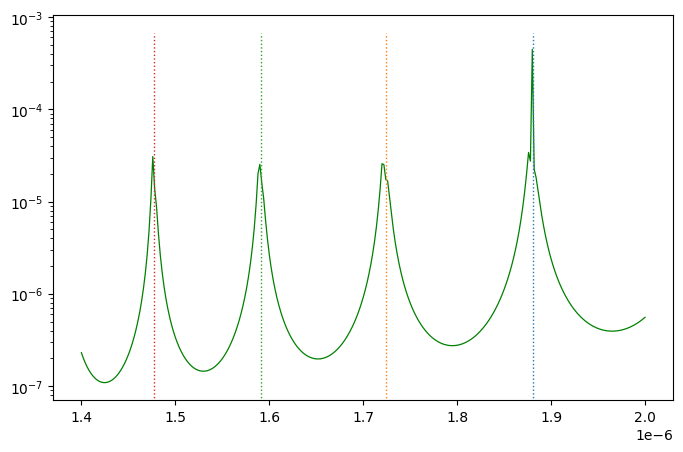

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

ax.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
ym,yM = ax.get_ylim()
for l in Ls:
    ax.plot([l,l], [0, yM],  linewidth=1, linestyle=':')

# Now do it with PML for varying values of alpha

In [10]:
ts2 = [15*2.7183333333333333e-6, 10e-6, 15*2.7183333333333333e-6,
      30e-6, 30e-6]
rhos =[sum(ts[:i]) for i in range(1, len(ts2)+1)]

ns2 = [lambda x: n_air, lambda x: n_glass, lambda x: n_air,
      lambda x: n_glass, lambda x: n_glass]
mats2 = ['core', 'glass', 'air', 'glass', 'Outer']
maxhs2 = [.2, .01, .1, .007, .04,]
scale = 15e-6


In [25]:
betas2 = np.zeros_like(wls, dtype=complex)

outer = 'pcb'
Ktype = 'kappa'
nu = 1
alpha = .01
pml = {'alpha':alpha, 'R0':rhos[-2]}


In [26]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts2, ns=ns2, mats=mats2, maxhs=maxhs2, wl=wl, scale=scale, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = betas1[i]
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer, Ktype, pml), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess = 1/.999999 * guess.real + imag * 1j
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer, Ktype, pml)), '\n\n' )
                imag = beta.imag  # set current imaginary part as guess for next one
                flag=False
        except RuntimeError:
            guess = .999999 * guess.real + 1j * imag
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.3328044023732-1.9847671588446115e-07j) . Residual of determinant:  5.616739148660784e-10 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.23672166594653-1.659097214100065e-07j) . Residual of determinant:  9.804601971503473e-10 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (67.14091439794512-1.4878738678329477e-07j) . Residual of determinant:  2.6980637955172267e-09 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (67.04538100620263-1.4680297790398547e-07j) . Residual of determinant:  5.117331262838421e

Scaled beta:  (64.38843751004875-8.224692206358213e-07j) . Residual of determinant:  1.3463539122997406e-09 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.30053519662496-9.692912405144503e-07j) . Residual of determinant:  3.4369938207453583e-10 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.21285651632346-1.3509672383032022e-06j) . Residual of determinant:  7.562077117261563e-10 


     --------------------  36/301: wavelength: 1.47e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (64.12538967464718-2.1556944749653033e-06j) . Residual of determinant:  1.9645789522168455e-10 


     --------------------  37/301: wavelength: 1.4719999999999998e-06  --------------------     

Boundary names not provided, using default names.
Sca

Scaled beta:  (61.44988965214306-1.878474761893945e-07j) . Residual of determinant:  2.5977102724877423e-09 


     --------------------  69/301: wavelength: 1.536e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.36985391831926-1.5614495975383366e-07j) . Residual of determinant:  1.3919358879517783e-09 


     --------------------  70/301: wavelength: 1.538e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.29002619884798-1.3350663148429288e-07j) . Residual of determinant:  5.37855978148143e-09 


     --------------------  71/301: wavelength: 1.5399999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (61.21040566104285-1.2697873598881168e-07j) . Residual of determinant:  3.639104843061209e-10 


     --------------------  72/301: wavelength: 1.5419999999999998e-06  --------------------     

Boundary names not provided, using defau

Scaled beta:  (58.989021265797696-3.307279596006688e-06j) . Residual of determinant:  1.1278665619776701e-10 


     --------------------  101/301: wavelength: 1.6e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.915105148004805-2.1261619836732886e-06j) . Residual of determinant:  5.744616166059926e-11 


     --------------------  102/301: wavelength: 1.6019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.841431774621476-1.518960678197674e-06j) . Residual of determinant:  6.489669186900748e-10 


     --------------------  103/301: wavelength: 1.6039999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (58.76797381127419-1.153810667199988e-06j) . Residual of determinant:  1.4630522367679912e-10 


     --------------------  104/301: wavelength: 1.606e-06  --------------------     

Boundary names not provided, using d

Scaled beta:  (56.58002879098953-1.727292308482799e-07j) . Residual of determinant:  1.3891838808755966e-09 


     --------------------  135/301: wavelength: 1.668e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (56.512163581503906-1.7820453619980754e-07j) . Residual of determinant:  7.443682314794848e-10 


     --------------------  136/301: wavelength: 1.6699999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.444460670314704-1.9185372523943054e-07j) . Residual of determinant:  2.9489575846996545e-09 


     --------------------  137/301: wavelength: 1.6719999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (56.37691943970981-2.26907078091738e-07j) . Residual of determinant:  3.6559289328149752e-09 


     --------------------  138/301: wavelength: 1.674e-06  --------------------     



scaling guess: 1
scaling guess: 2
Scaled beta:  (54.361345993293384-2.8387169031850433e-06j) . Residual of determinant:  7.25767383195849e-11 


     --------------------  169/301: wavelength: 1.736e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.29859123503828-2.1421879959119552e-06j) . Residual of determinant:  3.192395497091676e-10 


     --------------------  170/301: wavelength: 1.738e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (54.236010687521514-1.6645024229413522e-06j) . Residual of determinant:  3.284707364614418e-10 


     --------------------  171/301: wavelength: 1.7399999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (54.17359296583972-1.3721918219850695e-06j) . Residual of determinant:  1.1807222798828604e-10 


     --------------------  172/301: wavelength: 1.742e-06  ------

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (52.366919408258255-4.090267833145585e-07j) . Residual of determinant:  1.2126865073952521e-09 


     --------------------  202/301: wavelength: 1.8019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.308775749802116-3.560464380855579e-07j) . Residual of determinant:  6.608148928684973e-10 


     --------------------  203/301: wavelength: 1.804e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.25076089021914-2.9234838121948386e-07j) . Residual of determinant:  6.103891313295116e-10 


     --------------------  204/301: wavelength: 1.806e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (52.1928744017164-2.4901397361940353e-07j) . Residual of determinant:  1.115310738669844e-09 


     --------------------  205/301: wavelength: 1.8079999999999999e-06  ------------

Scaled beta:  (50.56790653483767-2.8388965735533385e-06j) . Residual of determinant:  5.2454097025946895e-11 


     --------------------  234/301: wavelength: 1.8659999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (50.513624433709154-3.6938786798678464e-06j) . Residual of determinant:  1.2495087456813514e-10 


     --------------------  235/301: wavelength: 1.868e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (50.45944151213396-4.908401073490591e-06j) . Residual of determinant:  6.751062328975321e-11 


     --------------------  236/301: wavelength: 1.8699999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (50.405349831988296-6.776147756483602e-06j) . Residual of determinant:  1.269002070732037e-10 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------

Scaled beta:  (48.88941344167317-4.549151596497867e-07j) . Residual of determinant:  1.6695351769508363e-09 


     --------------------  266/301: wavelength: 1.9299999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (48.83872372576965-4.4578599599507276e-07j) . Residual of determinant:  1.1858583526703932e-10 


     --------------------  267/301: wavelength: 1.932e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (48.788139518571185-4.71361408002336e-07j) . Residual of determinant:  6.07069640895818e-10 


     --------------------  268/301: wavelength: 1.9339999999999996e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (48.73766043910912-5.35792738218666e-07j) . Residual of determinant:  1.4996822351769849e-09 


     --------------------  269/301: wavelength: 1.9359999999999998e-06  --------------------     

Boundary names not provid

Scaled beta:  (47.3179220985335-3.635337272709122e-07j) . Residual of determinant:  2.4303470043414506e-11 


     --------------------  298/301: wavelength: 1.994e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (47.270437827812984-4.135726989928486e-07j) . Residual of determinant:  3.830298066097235e-10 


     --------------------  299/301: wavelength: 1.996e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (47.223048491391694-5.03735596992922e-07j) . Residual of determinant:  3.796427089680115e-10 


     --------------------  300/301: wavelength: 1.9979999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (47.17575380719958-6.410502084607118e-07j) . Residual of determinant:  6.273730473266883e-10 


     --------------------  301/301: wavelength: 2e-06  --------------------     

Bound

<IPython.core.display.Javascript object>


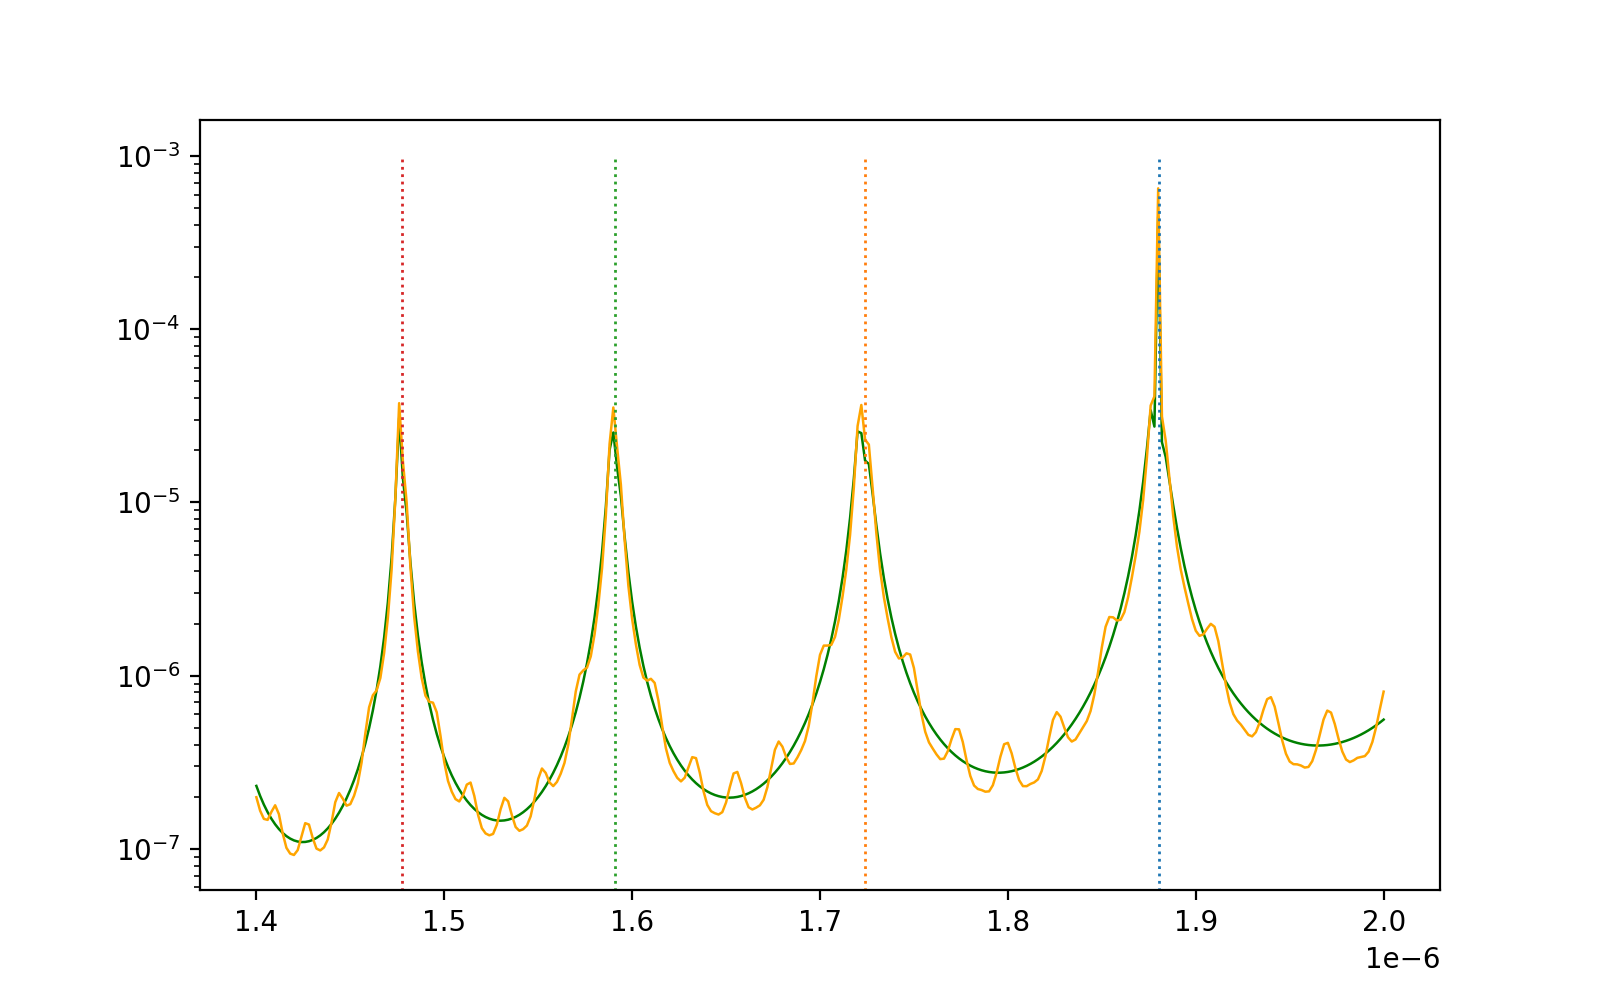

In [28]:
%matplotlib notebook
fig = plt.figure(figsize=(8,5))
ax = plt.gca()

ax.plot(wls, -betas1.imag, color='green', linewidth=.9)
ax.plot(wls, -betas2.imag, color='orange', linewidth=.9)

plt.yscale('log')
ym,yM = ax.get_ylim()
for l in Ls:
    ax.plot([l,l], [0, yM],  linewidth=1, linestyle=':')

# Ripples in this one

This seems to happen only when there is high index material to the boundary.